In [1]:
import prtools as pr
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

from jupyterthemes import jtplot
jtplot.style(theme="oceans16")

$$\sum_{i=1}^N (x_{i}^Tw-y_i)^2 + \lambda ||w|| = ||Xw-Y||^2 + \lambda ||w||^2$$

# Exercise 3.1

(a)
\begin{equation}
X = 
    \begin{bmatrix}
    x_{11} & x_{12} & x_{13} \\
    x_{21} & x_{22} & x_{23} \\
    x_{31} & x_{32} & x_{33}
    \end{bmatrix}
\end{equation}

\begin{equation}
X^TX = 
    \begin{bmatrix}
    x_{11}^2 & x_{12}^2 & x_{13}^2 \\
    x_{21}^2 & x_{22}^2 & x_{23}^2 \\
    x_{31}^2 & x_{32}^2 & x_{33}^2
    \end{bmatrix}^T
\end{equation}

\
A is positive semidefinite if, for any vector x with real components, the dot product of Ax and x is nonnegative,
\
<Ax, xi> ≥ 0


(b)
<br> 半正定矩阵+微扰则 $\to$ 正定矩阵 $\to$ 可逆 (该结论由SVD分解推理出)
<br> $X^TX v = \lambda v$
<br> ($X^TX + \lambda I) v = \lambda v + \lambda Iv = (\lambda + 1)v $
<br> 若所有特征值均不小于零，则称为半正定。若所有特征值均大于零，则称为正定。

(c)
<br> $\frac{d}{dw}||Xw-Y||^2 + \lambda ||w||^2 = 0$
<br> $w = (X^TX + \lambda I)^{-1} X^TY$

(e)
<br> $||w||^2 < \tau, where \ \tau \propto \frac{1}{\lambda}$
<br> w = 0


# Exercise 3.2

<br>加上所有参数（不包括$w_0$）的绝对值之和，即l1范数，此时叫做Lasso回归；
<br>加上所有参数（不包括$w_0$）的平方和，即l2范数的平方，此时叫做ridge回归.

# Exercise 3.3

In [2]:
def genstdNoise(x):
    return np.random.randn(x.shape[0], x.shape[1])

(a)

In [3]:
x_train = np.random.uniform(low=0.0, high=1.0, size=(10,1))
y_trian = x_train + genstdNoise(x_train)
x_test = np.random.uniform(low=0.0, high=1.0, size=(10000,1))
y_test = x_test + genstdNoise(x_test)

trainData = pr.gendatr(x_train, targets=y_trian)
testData = pr.gendatr(x_test, targets=y_test)

print("trainData shape: ", trainData.shape)
print("testData shape: ", testData.shape)

trainData shape:  (10, 1)
testData shape:  (10000, 1)


SSE:  13565.1462679532
w: [[ 1.78091509]
 [-0.95534954]]


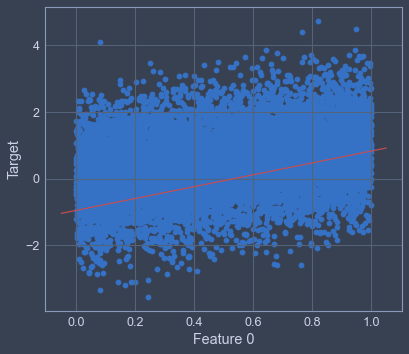

In [4]:
pr.scatterr(testData)
lamb = 0.001
w = pr.ridger(trainData, lamb)
y_hat = w(x_test)
pr.plotr(w, color="r")
print("SSE: ", np.sum((+y_hat - +y_test) ** 2))
print("w:", +w)

(b)
<br> 拟合过程中通常都倾向于让权值尽可能小，最后构造一个所有参数都比较小的模型。因为一般认为参数值小的模型比较简单，能适应不同的数据集，也在一定程度上避免了过拟合现象。可以设想一下对于一个线性回归方程，若参数很大，那么只要数据偏移一点点，就会对结果造成很大的影响；但如果参数足够小，数据偏移得多一点也不会对结果造成什么影响，专业一点的说法是抗扰动能力强。
<br> https://www.cnblogs.com/zingp/p/10375691.html#_label0

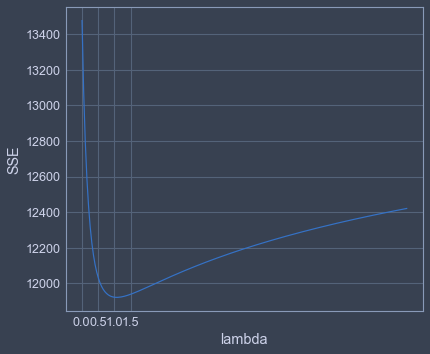

In [5]:
lamb = np.arange(0.01, 10, 0.05)
SSE = np.zeros(len(lamb))
for i in range(len(lamb)):
    w = pr.ridger(trainData, lamb[i])
    y_hat = w(x_test)
    SSE[i] = (np.sum((+y_hat - y_test) ** 2))
    
plt.plot(lamb, SSE)
plt.xlabel("lambda")
plt.ylabel("SSE")
plt.xticks(np.arange(0,2,0.5))
plt.show()

# Exercise 3.4

I have shown in the previous question, but it will be better to use CV to do that learning curve.

# Exercise 3.5

if $\lambda \to 0$, the term $\lambda ||w||^2$ is negligible, which means when minimizing the loss/cost, minimizing the $||Xw-Y||^2$ is more significant to reduce the loss/cost. The solution tends to base on the solution of minimizing the $||Xw-Y||^2$.

# Exercise 3.6

Not done

# Exercise 3.7

(a)
<br>No, none of the entries ever become zero really. The probability that this happens is 0. In the limit, for  larer and larger, w should of course shrink to 0 however.


In [6]:
x = np.random.randn(20, 2)
y = x[:,0] + 0.2 * np.random.randn(20)
data = pr.gendatr(x, y)

[[0.9719399 ]
 [0.00857389]
 [0.06229752]]


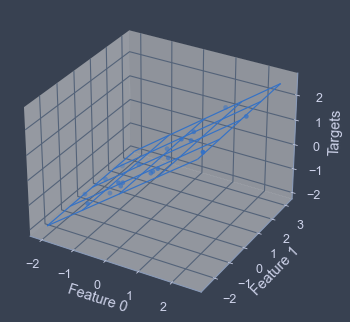

In [7]:
w = pr.ridger(data, 0.001)
pr.scatterr(data)
pr.plotr(w, gridsize=5)
print(+w)

(b)
<br>In this setting there will be a finite  for which at least on of the entries (most often the second of course!) becomes zero. For an even larger , also the other entry will become 0

[[0.20646807]
 [0.        ]
 [0.13824355]]


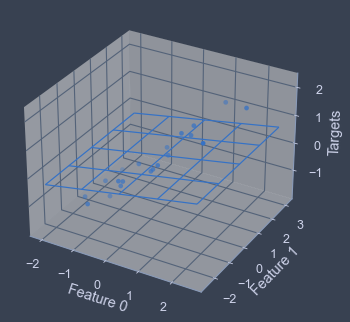

In [8]:
w = pr.lassor(data, 1)
pr.scatterr(data)
pr.plotr(w, gridsize=5)
print(+w)

# Exercise 3.8

(a)
<br> hypothesis class: $\omega \in \Re^d$
<br> loss: $lim_{w \in \Re^d} ||w^TX - Y||^2$
<br> Regularization: $\lambda ||w||$ or $\lambda ||w||^2$

(b)
the answer is the same as (a), but it doesn't have regularization term

# Exercise 3.9

(a)
SSE Loss for a single point= $(wx_i - y_i)^2$

(a)
LLE Loss for a signle point = $-log \ h(x,y|\theta)$

(c)
AUC

(d)
K-NN

# Exercise 3.10

not done

# Exercise 3.11

(a)
$$p(x,y) = p(y|x)p(x) = \frac{1}{2 \sigma \tau \pi} e^{-( \frac{(y-(xw+w_0))^2}{2 \sigma^2} + \frac{(x-v)^2}{2 \tau^2})}$$
$$p(x,y)p(w) = \frac{1}{\sigma \tau s (2\pi)^{3/2}} e^{-( \frac{(y-(xw+w_0))^2}{2 \sigma^2} + \frac{(x-v)^2}{2 \tau^2}) + \frac{w^2}{2 s^2} )}$$
$$max_w log \ p(x,y)p(w) \simeq min_w ( \frac{(y-(xw+w_0))^2}{2 \sigma^2} + \frac{(x-v)^2}{2 \tau^2}) + \frac{w^2}{2 s^2} )$$
$$\to_{only \ consider \ w \ terms} min_w (\frac{(y-(xw+w_0))^2}{2 \sigma^2} + \frac{w^2}{2 s^2})$$

(b)
<br> in order to minize (3.1), w should be small, but it cannot set too samll so as to underfit.

(c)
shown in 3.3

# Exercise 3.12

not done

# Exercise 3.13

In [9]:
t = pr.gendath(n=(500, 500))

In [10]:
for i in range(30):
    a = pr.gendath(n=(20, 20))

    # e = t * pr.ldc(a) * pr.testc()
    LDC = pr.ldc(a)
    error = pr.testc(LDC.eval(t))
    print("error rate:", error)

error rate: 0.199
error rate: 0.18
error rate: 0.225
error rate: 0.169
error rate: 0.192
error rate: 0.184
error rate: 0.181
error rate: 0.171
error rate: 0.174
error rate: 0.158
error rate: 0.204
error rate: 0.135
error rate: 0.189
error rate: 0.198
error rate: 0.211
error rate: 0.218
error rate: 0.157
error rate: 0.185
error rate: 0.249
error rate: 0.187
error rate: 0.176
error rate: 0.179
error rate: 0.238
error rate: 0.203
error rate: 0.19
error rate: 0.174
error rate: 0.242
error rate: 0.162
error rate: 0.194
error rate: 0.233


(a)
<br> the training set changes every time $\to$ the fitting curve changes every time $\to$ the error rate changes every time

In [11]:
a = pr.gendath(n=(20,20))
w = pr.ldc(a)

In [12]:
for i in range(30):
    t = pr.gendath(n=(500, 500))
    error = pr.testc(w.eval(t))
    print("error rate:", error)

error rate: 0.239
error rate: 0.223
error rate: 0.249
error rate: 0.252
error rate: 0.245
error rate: 0.258
error rate: 0.256
error rate: 0.268
error rate: 0.262
error rate: 0.24
error rate: 0.265
error rate: 0.228
error rate: 0.235
error rate: 0.245
error rate: 0.25
error rate: 0.243
error rate: 0.229
error rate: 0.238
error rate: 0.235
error rate: 0.241
error rate: 0.239
error rate: 0.244
error rate: 0.226
error rate: 0.228
error rate: 0.253
error rate: 0.23
error rate: 0.234
error rate: 0.254
error rate: 0.217
error rate: 0.261


(b)
<br> the testing set changes every time $\to$ the error rate changes every time
<br> I believe the variance of the latter results is smaller than the fomer one

# Exercise 3.14
https://www.jianshu.com/p/0414b6ccc88c

In [13]:
data = pr.gendath(n=(1000,1000))
feature = +data
label = pr.genlab(n=(1000,1000), lab=[-1, 1])
noiseFeature = np.hstack((feature, np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)

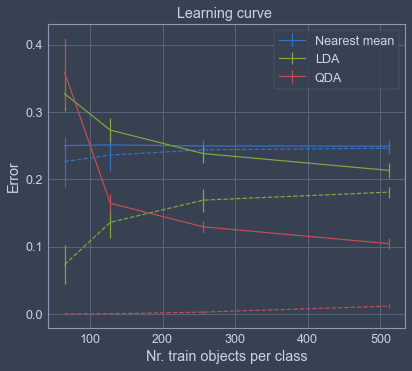

In [14]:
u = [pr.nmc(), pr.ldc(), pr.qdc()]
e_nmc = pr.cleval(noiseData, u[0], trainsize=[65, 128, 256, 512], nrreps=20)
e_ldc = pr.cleval(noiseData, u[1], trainsize=[65, 128, 256, 512], nrreps=20)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[65, 128, 256, 512], nrreps=20)
plt.legend()

(a)
<br> the error rate of the testing curve is decreasing, and the one of the training curve is increasing, when the quantity of the training obejcts increases.

(b)
<br> w tends to be stable when the training set is large enough
<br> I prefer QDA, which has the lowest error rate
<br> <b> Ans: Simpler classifiers work generally better when sample sizes are small. None of the classifiers is best.

(c)
<br> it will be level-off

# Exercise 3.15

In [15]:
data = pr.gendath(n=(500,500))
feature = +data
label = pr.genlab(n=(500,500), lab=[-1, 1])
noiseFeature = np.hstack((+data, np.random.rand(1000,60)))
noiseData = pr.prdataset(noiseFeature, label)

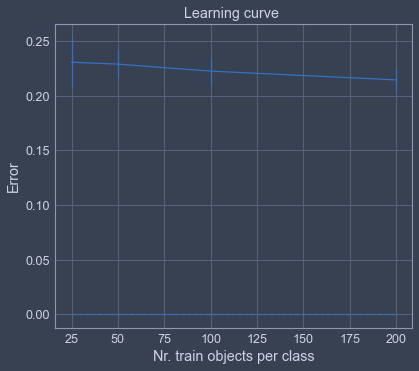

In [16]:
e_nmc = pr.cleval(noiseData, pr.knnc((1)), trainsize=[25, 50, 100, 200], nrreps=10)

The 1-NN classifier has a zero apparent error

# Exercise 3.16

In [17]:
data = pr.gendatd(n=(1000,1000))
feature = +data
label = pr.genlab(n=(1000,1000), lab=[-1, 1])
noiseFeature = np.hstack((feature, np.random.rand(2000,60)))
noiseData = pr.prdataset(noiseFeature, label)

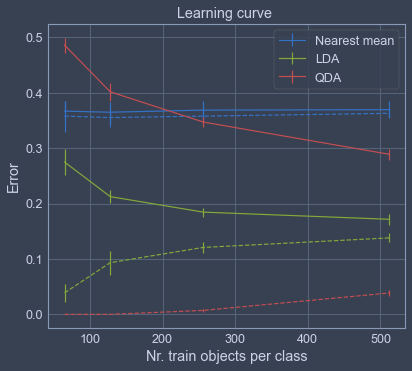

In [18]:
u = [pr.nmc(), pr.ldc(), pr.qdc()]
e_nmc = pr.cleval(noiseData, u[0], trainsize=[65, 128, 256, 512], nrreps=20)
e_ldc = pr.cleval(noiseData, u[1], trainsize=[65, 128, 256, 512], nrreps=20)
e_qdc = pr.cleval(noiseData, u[2], trainsize=[65, 128, 256, 512], nrreps=20)
plt.legend()

(a)
<br>  The curves will perfomance in a different kind of way because of the difference in data distributions and the way the classifiers fit these distributions.

# Exercise 3.17

Not done

# Exercise 3.18

Not done

# Exercise 3.19

<font color="red"> Ask for TAs </font>

<br> This dataset consists of features of handwritten numerals (0-9) extracted from a collection of Dutch utility maps. <b>200 patterns per class</b> (for a total of 2,000 patterns) have been digitized in binary images.
<br> In each file the 2000 patterns are stored in ASCI on 2000 lines. The first 200 patterns are of class 0, followed by sets of 200 patterns for each of the classes 1-9. Corresponding patterns in different feature sets (files) correspond to the same original character.

In [19]:
kar = np.loadtxt("mfeat-kar.txt", dtype=np.float64)
label = pr.genlab(n=[200]*10, lab = [0,1,2,3,4,5,6,7,8,9])
data = pr.prdataset(kar, targets=label)
print(data)

2000 by 64 prdataset with 10 classes: [200 200 200 200 200 200 200 200 200 200]


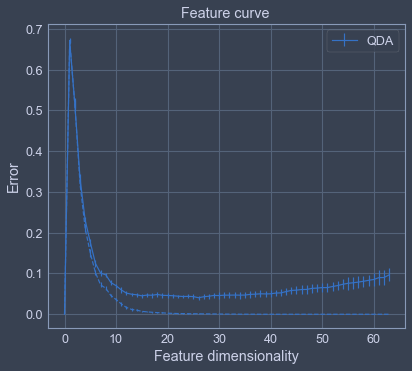

In [20]:
classifier = pr.qdc()
e_qdc = pr.clevalf(data, classifier, trainsize=0.4, nrreps=10)
plt.legend()
plt.show()

# Exercise 3.20

(a)

In [21]:
data = pr.gendatb(n=(20,20), s=2.0)
knn1 = pr.knnc((1))
knn3 = pr.knnc((3))

for n in range(2,11):
    e_knn1 = pr.prcrossval(data, knn1, k=n, nrrep=3)
    e_knn3 = pr.prcrossval(data, knn3, k=n, nrrep=3)

    e1 = np.sum(e_knn1, axis=1)/e_knn1.shape[1]
    e3 = np.sum(e_knn3, axis=1)/e_knn3.shape[1]
    
    print("N = " + str(n), "\t", "mean", "\t", "variance")
    print("1-nn \t", np.round(np.mean(e1),3), "\t", np.round(np.var(e1),3))
    print("3-nn \t", np.round(np.mean(e3),3), "\t", np.round(np.var(e3),3))
    print()

N = 2 	 mean 	 variance
1-nn 	 0.108 	 0.002
3-nn 	 0.133 	 0.003

N = 3 	 mean 	 variance
1-nn 	 0.083 	 0.001
3-nn 	 0.14 	 0.001

N = 4 	 mean 	 variance
1-nn 	 0.142 	 0.004
3-nn 	 0.142 	 0.0

N = 5 	 mean 	 variance
1-nn 	 0.092 	 0.003
3-nn 	 0.15 	 0.006

N = 6 	 mean 	 variance
1-nn 	 0.076 	 0.002
3-nn 	 0.137 	 0.002

N = 7 	 mean 	 variance
1-nn 	 0.087 	 0.003
3-nn 	 0.115 	 0.004

N = 8 	 mean 	 variance
1-nn 	 0.101 	 0.002
3-nn 	 0.118 	 0.004

N = 9 	 mean 	 variance
1-nn 	 0.09 	 0.006
3-nn 	 0.133 	 0.014

N = 10 	 mean 	 variance
1-nn 	 0.075 	 0.003
3-nn 	 0.108 	 0.007



(b) + (c)
<br> Typically you get a less biased estimate of the error when you increase n, but the variance
typically increases a bit with larger n

(d)
Typically you get a less biased estimate of the error when you increase n, but the variance typically increases a bit with larger n

# Exercise 3.21

Not done

# Exercise 3.22 + 3.23

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# confmat from prtools cannot be used on python, that's suck

# I will do 3.23 instead of 3.22, they are redundant

(22.b) lab is the true target, whereas lab2 is the predicted target

(23.a)

In [23]:
kar = np.loadtxt("mfeat-kar.txt", dtype=np.float64)
zer = np.loadtxt("mfeat-zer.txt", dtype=np.float64)
label = pr.genlab(n=[200]*10, lab = [0,1,2,3,4,5,6,7,8,9])
data_kar = kar
data_zer = zer

print("kar set: ", data_kar.shape)
print("zer set ", data_zer.shape)

kar set:  (2000, 64)
zer set  (2000, 47)


In [24]:
x_train, x_test, y_train, y_test = train_test_split(data_kar, label, test_size=0.3, random_state=40)
print("total test sample:", len(x_test))

total test sample: 600


In [25]:
qdc = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
y_hat = qdc.predict(x_test)
print(confusion_matrix(y_test, y_hat, labels=[0,1,2,3,4,5,6,7,8,9]))
error = np.sum(y_hat != y_test)/len(y_hat)
print("error rate: ", error)

[[59  0  0  0  0  0  0  0  3  0]
 [ 0 55  1  0  0  1  0  0  2  1]
 [ 0  0 55  0  0  0  0  0  0  1]
 [ 0  0  0 60  0  3  0  0  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  2  0 52  0  0  0  0]
 [ 0  0  0  0  0  0 71  0  1  0]
 [ 0  1  2  2  0  0  0 52  0  4]
 [ 0  0  0  1  0  0  0  0 66  0]
 [ 0  0  0  0  0  0  0  0  0 54]]
error rate:  0.041666666666666664


In [26]:
x_train, x_test, y_train, y_test = train_test_split(data_zer, label, test_size=0.3, random_state=40)
print("total test sample:", len(x_test))

total test sample: 600


In [27]:
qdc = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
y_hat = qdc.predict(x_test)
print(confusion_matrix(y_test, y_hat, labels=[0,1,2,3,4,5,6,7,8,9]))
error = np.sum(y_hat != y_test)/len(y_hat)
print("error rate: ", error)

[[58  0  0  0  0  1  0  0  3  0]
 [ 0 53  0  1  2  1  3  0  0  0]
 [ 0  0 51  2  0  2  1  0  0  0]
 [ 0  0  2 55  0  4  1  0  0  1]
 [ 0  2  0  0 49  0  0  0  0  0]
 [ 0  0  0  2  1 49  2  0  0  0]
 [ 0  0  0  0  0  0 21  0  1 50]
 [ 0  0  0  2  1  0  0 57  0  1]
 [ 2  1  0  1  1  4  1  0 55  2]
 [ 0  0  0  0  0  2 37  0  0 15]]
error rate:  0.22833333333333333


(c)
<br> I don't know what does the question mean. It is stupid to judge it from a confusion matrix. Why not observe it from the feature learning curve?

# Exercise 3.24

(a)
<br>The answer is b=2c. If it is a cost matrix, I can't agree more, but it is a confustion matrix, so I prefer c=2b. 

# Exercise 3.25

Not done